In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("divorce.csv")

In [3]:
df

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


## Factor Analysis

In [4]:
X = df.drop(columns=['Divorce_Y_N'], axis=1)

Bartlett's test of sphericity

H0 : Correlation matrix is an Identical matrix

H1 : Correlation matrix is not Identical matrix

In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value=calculate_bartlett_sphericity(X)
print("Chi Square Value",chi_square_value)
print('P-value', p_value)

# p < 0.05 correlation present amoung the variables

Chi Square Value 17606.430077903187
P-value 0.0


In [6]:
# Kaiser-Meyer-Olkin (KMO) Test 

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
print("KMO Value=",kmo_model)

#KMO score is close to 1, thus applying factor analysis can be effective for the dataset

KMO Value= 0.9643724872807456


c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [11]:
df.columns

Index(['Sorry_end', 'Ignore_diff', 'begin_correct', 'Contact', 'Special_time',
       'No_home_time', '2_strangers', 'enjoy_holiday', 'enjoy_travel',
       'common_goals', 'harmony', 'freeom_value', 'entertain', 'people_goals',
       'dreams', 'love', 'happy', 'marriage', 'roles', 'trust', 'likes',
       'care_sick', 'fav_food', 'stresses', 'inner_world', 'anxieties',
       'current_stress', 'hopes_wishes', 'know_well', 'friends_social',
       'Aggro_argue', 'Always_never', 'negative_personality',
       'offensive_expressions', 'insult', 'humiliate', 'not_calm',
       'hate_subjects', 'sudden_discussion', 'idk_what's_going_on',
       'calm_breaks', 'argue_then_leave', 'silent_for_calm',
       'good_to_leave_home', 'silence_instead_of_discussion',
       'silence_for_harm', 'silence_fear_anger', 'I'm_right', 'accusations',
       'I'm_not_guilty', 'I'm_not_wrong', 'no_hesitancy_inadequate',
       'you're_inadequate', 'incompetence', 'Divorce_Y_N'],
      dtype='object')

In [7]:
# Choosing the Number of Factors

from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None)
fa.fit(X)
ev,v =fa.get_eigenvalues()
ev

array([4.01756867e+01, 2.16531589e+00, 1.41651436e+00, 1.19405368e+00,
       8.96249766e-01, 7.88897467e-01, 6.98636632e-01, 5.95362778e-01,
       5.68366461e-01, 5.29115848e-01, 4.28671399e-01, 3.90369411e-01,
       3.62469358e-01, 3.19198119e-01, 2.83031788e-01, 2.70341457e-01,
       2.52520084e-01, 2.20402276e-01, 2.02203198e-01, 1.91133304e-01,
       1.75596029e-01, 1.65126304e-01, 1.38913064e-01, 1.32199503e-01,
       1.19176457e-01, 1.07826952e-01, 1.03507589e-01, 1.00321611e-01,
       9.48779953e-02, 8.83932265e-02, 7.82819003e-02, 7.10819919e-02,
       6.61273710e-02, 6.21878385e-02, 5.42665704e-02, 5.37969531e-02,
       5.01311101e-02, 4.64030261e-02, 3.99427933e-02, 3.83918809e-02,
       3.53348952e-02, 3.01372243e-02, 2.80488023e-02, 2.49852654e-02,
       2.17052887e-02, 2.16659686e-02, 1.81846648e-02, 1.60713319e-02,
       1.50625288e-02, 1.31196938e-02, 1.19387963e-02, 1.10997856e-02,
       9.73035916e-03, 7.82527366e-03])

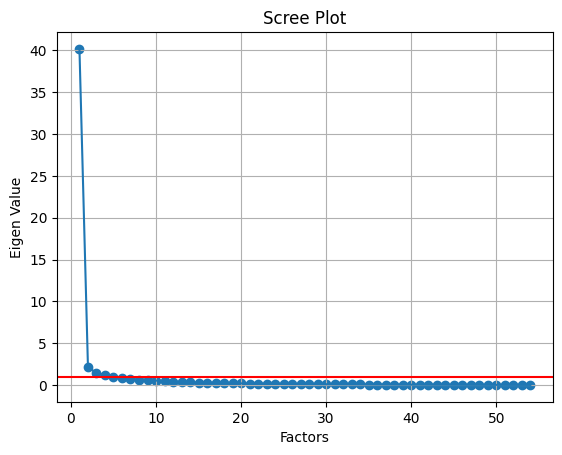

In [8]:

n = X.shape[1]
plt.scatter(range(1,n+1),ev)

plt.plot(range(1,n+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.axhline(y=1,color='r')

In [9]:
# Factor Analysis execution
fa = FactorAnalyzer(n_factors=4,rotation='varimax', method='principal')
fa.fit(X)

FactorAnalyzer(method='principal', n_factors=4, rotation='varimax',
               rotation_kwargs={})

In [9]:
import inspect
inspect.getfullargspec(FactorAnalyzer)

FullArgSpec(args=['self', 'n_factors', 'rotation', 'method', 'use_smc', 'is_corr_matrix', 'bounds', 'impute', 'svd_method', 'rotation_kwargs'], varargs=None, varkw=None, defaults=(3, 'promax', 'minres', True, False, (0.005, 1), 'median', 'randomized', None), kwonlyargs=[], kwonlydefaults=None, annotations={})

In [ ]:
a = ['Sorry_end','Ignore_diff','begin_correct','Contact','Special_time','enjoy_holiday','enjoy_travel','common_goals',
     'harmony','freeom_value','entertain','people_goals','dreams','love','happy','marriage','roles','trust','likes',
     'care_sick','fav_food','stresses','inner_world','anxieties','current_stress','hopes_wishes','know_well','friends_social',
     'sudden_discussion','idk_whats_going_on','calm_breaks','good_to_leave_home']
b= ['argue_then_leave','silent_for_calm','silence_instead_of_discussion','silence_for_harm','silence_fear_anger']
c=['Aggro_argue','Always_never','negative_personality','offensive_expressions','insult','humiliate','not_calm','hate_subjects','Im_right',
   'accusations','Im_not_guilty','Im_not_wrong','no_hesitancy_inadequate','youre_inadequate','incompetence']
d=['No_home_time','2_strangers']

In [10]:
# Factor Loadings

fa.loadings_

floading=pd.DataFrame(fa.loadings_,index=X.columns)
floading

,0,1,2,3
Sorry_end,0.728937,0.224956,0.455017,0.155618
Ignore_diff,0.815065,0.228522,0.361596,-0.041964
begin_correct,0.726619,0.103170,0.424209,0.161840
Contact,0.761966,0.149873,0.419410,0.093580
Special_time,0.683092,0.349815,0.543600,0.136087
No_home_time,0.042895,0.099813,0.183539,0.881032
2_strangers,0.495454,-0.043624,0.052352,0.644300
enjoy_holiday,0.785042,0.299144,0.426836,0.021970
enjoy_travel,0.751833,0.320102,0.448410,0.202062
common_goals,0.800841,0.166961,0.366236,0.171334


In [11]:
# Factor Scores
fscore = fa.transform(X)

fscore_data=pd.DataFrame(fscore)
fscore_data

,0,1,2,3
0,-0.746628,-0.963401,0.789629,-0.496849
1,1.417390,-0.914318,0.030392,-0.408152
2,0.824398,-0.124829,-1.308631,2.845540
3,1.034521,-0.554783,-0.873702,3.162281
4,-0.082114,0.138233,-1.001100,-0.096981
...,...,...,...,...
165,-1.591673,-2.573143,2.459211,-0.687193
166,-1.609503,0.642635,0.229238,-0.457197
167,-0.447329,0.234817,-0.934859,-0.399774
168,-1.504161,0.421215,0.294074,-0.531913


In [12]:
transform_data = fscore_data.rename(columns={0:'relationship_dynamics', 1:'communication_pattern', 2:'negative_interaction',3:'external_stressors'})

In [13]:
transform_data

,relationship_dynamics,communication_pattern,negative_interaction,external_stressors
0,-0.746628,-0.963401,0.789629,-0.496849
1,1.417390,-0.914318,0.030392,-0.408152
2,0.824398,-0.124829,-1.308631,2.845540
3,1.034521,-0.554783,-0.873702,3.162281
4,-0.082114,0.138233,-1.001100,-0.096981
...,...,...,...,...
165,-1.591673,-2.573143,2.459211,-0.687193
166,-1.609503,0.642635,0.229238,-0.457197
167,-0.447329,0.234817,-0.934859,-0.399774
168,-1.504161,0.421215,0.294074,-0.531913


## Linear Regression

In [14]:
X = transform_data
y = df['Divorce_Y_N']

In [15]:
new = pd.concat([transform_data,y],axis=1)

In [17]:
new.to_csv('divorce_factor.csv',index=False)

In [41]:
X

,relationship_dynamics,communication_pattern,negative_interaction,external_stressors
0,-0.746628,-0.963401,0.789629,-0.496849
1,1.417390,-0.914318,0.030392,-0.408152
2,0.824398,-0.124829,-1.308631,2.845540
3,1.034521,-0.554783,-0.873702,3.162281
4,-0.082114,0.138233,-1.001100,-0.096981
...,...,...,...,...
165,-1.591673,-2.573143,2.459211,-0.687193
166,-1.609503,0.642635,0.229238,-0.457197
167,-0.447329,0.234817,-0.934859,-0.399774
168,-1.504161,0.421215,0.294074,-0.531913


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
model = LogisticRegression(max_iter=500,solver='liblinear')
model.fit(X,y)
pred = model.predict(X)

In [43]:
print(accuracy_score(y,pred))
print(confusion_matrix(y,pred))

0.9764705882352941
[[86  0]
 [ 4 80]]


In [29]:
model.intercept_

array([0.32854864])

In [28]:
model.coef_

array([[2.63141268, 1.03228219, 1.90031289, 1.24605463]])

In [59]:
predicted_prob = []
for i in range(model.predict_proba(X).shape[0]):

    predicted_prob.append(model.predict_proba(X)[i][0])

In [68]:
log_odds = []
for i in predicted_prob:
    log_odds.append(np.log((i/(1 - i))))

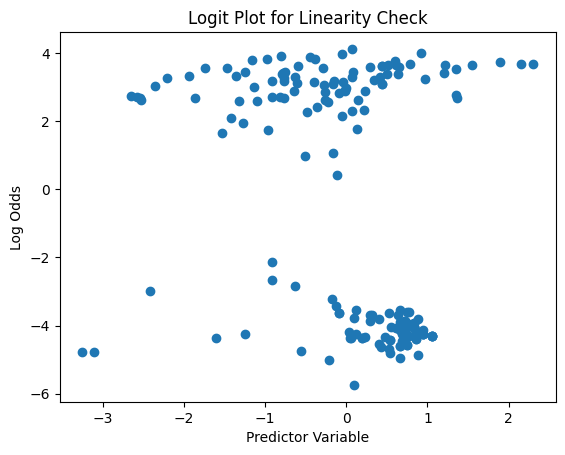

In [70]:
# Plot logit plot
plt.scatter(X['communication_pattern'], log_odds)
plt.xlabel('Predictor Variable')
plt.ylabel('Log Odds')
plt.title('Logit Plot for Linearity Check')
plt.show()
